In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Student_performance_data _.csv')

X = data.drop(['StudentID', 'GPA', 'GradeClass'], axis=1)
y = data['GradeClass']

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestClassifier()

cv_scores = cross_val_score(model, X_scaled, y, cv=5)  # Sử dụng 5-fold cross-validation

print('Cross-validation scores:', cv_scores)
print('Mean CV score:', cv_scores.mean())

Cross-validation scores: [0.7348643  0.72651357 0.73012552 0.73430962 0.59414226]
Mean CV score: 0.703991055284283


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6951983298538622
              precision    recall  f1-score   support

         0.0       0.60      0.14      0.22        22
         1.0       0.48      0.51      0.50        49
         2.0       0.53      0.58      0.55        85
         3.0       0.52      0.38      0.44        86
         4.0       0.84      0.94      0.89       237

    accuracy                           0.70       479
   macro avg       0.59      0.51      0.52       479
weighted avg       0.68      0.70      0.68       479



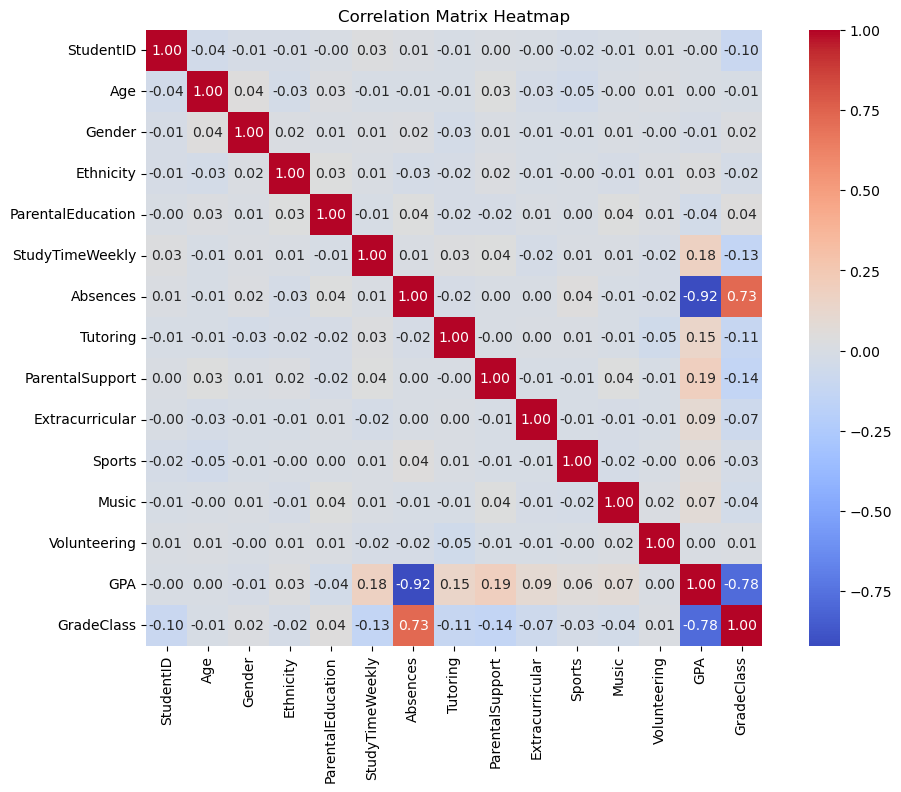

In [8]:

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()